# Chapter 10 - 일반 선형 모델 및 최소제곱법: 우주를 이해하기 위한 방법

In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False
plt.rc('font', family='NanumBarunGothic')


## 10-1. 오차에 따른 예측 데이터의 산점도를 만들고 잔차와 모델 예측 데이터 사이의 내적과 상관계수 계산
- 내적 or 상관계수 중 어느 것이 더 작으며 그 이유는 무엇인가?

In [2]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

X = np.hstack((np.ones((20, 1)), np.array(numcourses, ndmin=2).T))

# 왼쪽 역 계산
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# 계수
beta = X_leftinv @ happiness

In [3]:
beta

array([23.13033815,  3.69820606])

In [4]:
# 예측값
y_hat = X @ beta

# 오차
e =  happiness - y_hat

In [5]:
# 잔차가 예측 데이터와 직교하는지 확인
# → 거의 0에 가깝다 (직교)
print("내적 결과:", e @ y_hat)

# 상관계수 확인
print("상관 계수:", np.corrcoef(e, y_hat)[0, 1])

내적 결과: -1.3642420526593924e-11
상관 계수: -4.6202552280823255e-18


In [6]:
# 잔차와 예측 데이터 내적한 값이 0인지 확인 (직교)
np.allclose(e @ y_hat, 0)

True

In [7]:
# 잔차와 예측 데이터 상관관계 0인지 확인
np.allclose(np.corrcoef(e, y_hat)[0, 1], 0)

True

In [8]:
# 내적 값이 더 작다
e @ y_hat < np.corrcoef(y_hat, e)[0, 1]

True

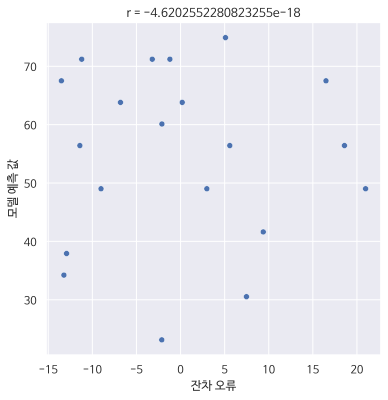

In [9]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=e, y=y_hat)
plt.xlabel('잔차 오류')
plt.ylabel('모델 예측 값')
plt.title(f"r = {np.corrcoef(y_hat, e)[0, 1]}")
plt.show()

## 10-2. 잔차 벡터가 설계 행렬을 생성하는 전체 부분공간과 직교하는 것을 구현

In [10]:
# 영공간: 행렬 A와 곱하여 영벡터를 만드는 모든 벡터 x의 집합
# 행공간: 전치 행렬의 열공간
# 왼쪽 영공간 (left nullspace): 전치 행렬의 영공간
left_nullspace = scipy.linalg.null_space(X.T)
left_nullspace.shape

(20, 18)

In [11]:
np.linalg.matrix_rank(left_nullspace)

18

In [12]:
# 잔차 벡터를 왼쪽 영공간에 추가하여 Augmented Matrix 생성
# 잔차 벡터가 영공간에 포함된다면 left_nullspace와 rank가 같아야 한다
np.hstack((left_nullspace, e.reshape(-1, 1))).shape

(20, 19)

In [13]:
np.linalg.matrix_rank(np.hstack((left_nullspace, e.reshape(-1, 1))))

18

## 10-4. 이상치를 생성해 최소제곱법에 미치는 영향 관찰
1. 데이터 벡터에서 첫 번쨰 관측된 데이터점을 70 → 170으로 변경 (데이터 입력 오타 시뮬레이션)
2. 그 다음 최소제곱 적합도를 다시 계산하고 데이터를 그래프로 그린다
3. 마지막 데이터 점을 70 → 170으로 변경, 첫 번째 데이터 점을 170 → 70으로 변경
4. 시각화 자료 만들어서 원본 데이터와 비교

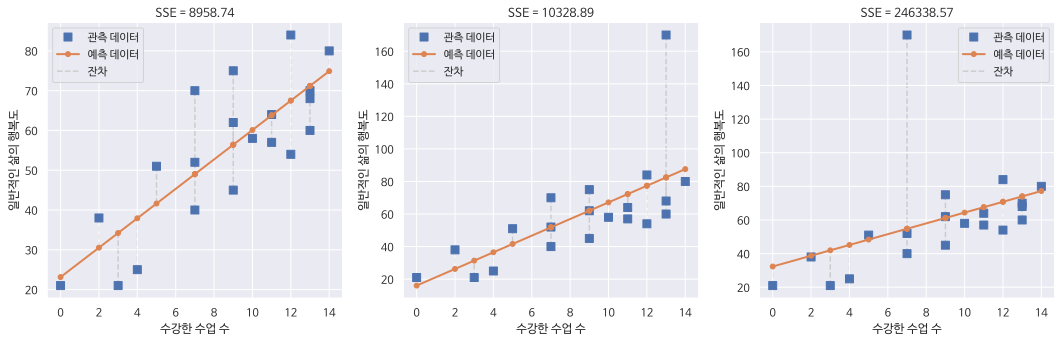

In [16]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_anomalies_a  = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_anomalies_b  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 행복도 리스트들을 리스트로 묶어준다
happy_list = [happiness, happiness_anomalies_a, happiness_anomalies_b]

for idx, (happy, ax) in enumerate(zip(happy_list, axs)):

    # 상수 (절편) 포함한 행렬 생성
    X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
    X_leftinv = np.linalg.inv(X.T @ X) @ X.T
    beta = X_leftinv @ happy

    # 예측 값 구하기
    y_hat = X @ beta

    # 관측 데이터, 예측 데이터 표시
    ax.plot(numcourses, happy, "s", markersize=8, label="관측 데이터")
    ax.plot(numcourses, y_hat, "o-", linewidth=2, markersize=5, label="예측 데이터")

    # 잔차 그리기
    for n, y, yHat in zip(numcourses, happy, y_hat):
        ax.plot([n, n], [y, yHat], "--", color=[.8, .8, .8], zorder=-10)
    
    # 빈 plot을 이용해 잔차 항목 legend에 추가
    ax.plot([], [], "--", color=[.8, .8, .8], label="잔차")

    ax.set_xlabel("수강한 수업 수")
    ax.set_ylabel("일반적인 삶의 행복도")
    ax.legend()
    ax.set_title(f"SSE = {np.sum((y_hat-y)**2):.2f}")

plt.tight_layout()
plt.show()